# 1. Image download and format change

In [1]:
url = 'https://cobslab.com/wp-content/uploads/2022/02/ai-009-1.jpg'

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import wget
from transformers import TFAutoModel, AutoTokenizer

In [3]:
image_path = tf.keras.utils.get_file('/content/image.jpg', origin=url)

In [4]:
image = tf.io.read_file(image_path)

In [5]:
#Tensor decoding
image = tf.image.decode_jpeg(image, channels=3)

In [6]:
#image

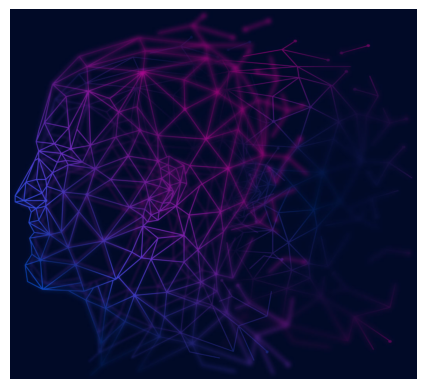

In [7]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
#sample RGB image, value of RGB is normally 8bit so, it' has value rang from 0 to 255
rgb_image = tf.random.uniform([100, 100, 3], maxval=255, dtype=tf.float32)
#print(rgb_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


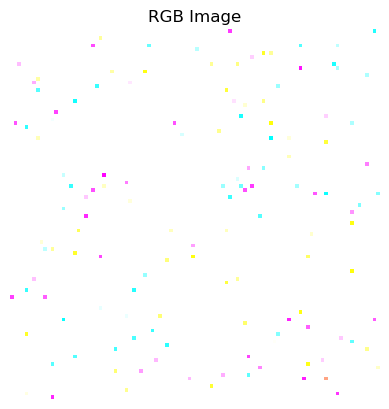

In [9]:
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')
plt.show()

(100, 100, 1)


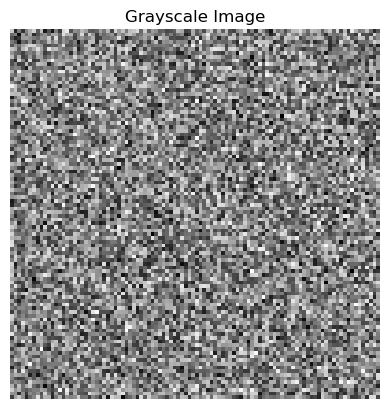

In [10]:
# rgb_tograyscale change RGB image to grayscale
grayscale_image = tf.image.rgb_to_grayscale(rgb_image)

print(grayscale_image.shape)
plt.imshow(grayscale_image.numpy().squeeze(), cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [11]:
#We can change grey scale manually
R = rgb_image[0][0][0]
G = rgb_image[0][0][1]
B = rgb_image[0][0][2]
Y = R + G + B
print(grayscale_image[0][0], Y)

tf.Tensor([196.6609], shape=(1,), dtype=float32) tf.Tensor(571.5896, shape=(), dtype=float32)


In [12]:
# rgb to hsv
hsv_image = tf.image.rgb_to_hsv(rgb_image)
hue_channel = hsv_image[:,:,0]

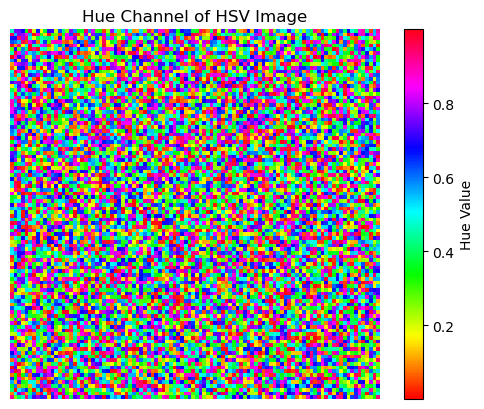

In [13]:
plt.imshow(hue_channel, cmap='hsv')
plt.title('Hue Channel of HSV Image')
plt.axis('off')
plt.colorbar(label='Hue Value')
plt.show()

# 2. Image Normalization and Standardization

In [14]:
#Normalization
normalized_image = rgb_image / 255.0
rgb_image[0][0], normalized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([146.44095, 220.7669 , 204.38176], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.57427824, 0.8657526 , 0.8014971 ], dtype=float32)>)

In [15]:
#Standardization
mean = tf.reduce_mean(rgb_image)
stddev = tf.math.reduce_std(rgb_image)

In [16]:
standardized_image = (rgb_image - mean) / stddev
rgb_image[0][0], standardized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([146.44095, 220.7669 , 204.38176], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.26258945, 1.2727697 , 1.0500757 ], dtype=float32)>)

# 3. Image Handling

## 3-1. Image Filtering

### 3-1-1. Median Filtering

In [17]:
def generate_salt_noise(image):
    num_salt = np.ceil(0.05 * image.size)
    coords = [np.random.randint(0, i -1, int(num_salt)) for i in image.shape] #salt noise 255, pepper noise 0
    salted_image = image.copy()
    salted_image[coords[0], coords[1]] = 255
    return salted_image

In [18]:
def generate_pepper_noise(image):
    num_pepper = np.ceil(0.05 * image.size)
    coords = [np.random.randint(0, i -1, int(num_pepper)) for i in image.shape] #salt noise 0, pepper noise 255
    peppered_image = image.copy()
    peppered_image[coords[0], coords[1]] = 0
    return peppered_image

--2024-09-07 15:57:58--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462729 (1.4M) [image/png]
Saving to: 'like_lenna.png.10'

     0K .......... .......... .......... .......... ..........  3% 2.55M 1s
    50K .......... .......... .......... .......... ..........  7% 3.03M 0s
   100K .......... .......... .......... .......... .......... 10% 2.53M 0s
   150K .......... .......... .......... .......... .......... 14% 4.98M 0s
   200K .......... .......... .......... .......... .......... 17% 9.10M 0s
   250K .......... .......... .......... .......... .......... 21% 3.78M 0s
   300K .......... .......... .......... .......... .......... 24% 8.64M 0s
   350K .......... ......

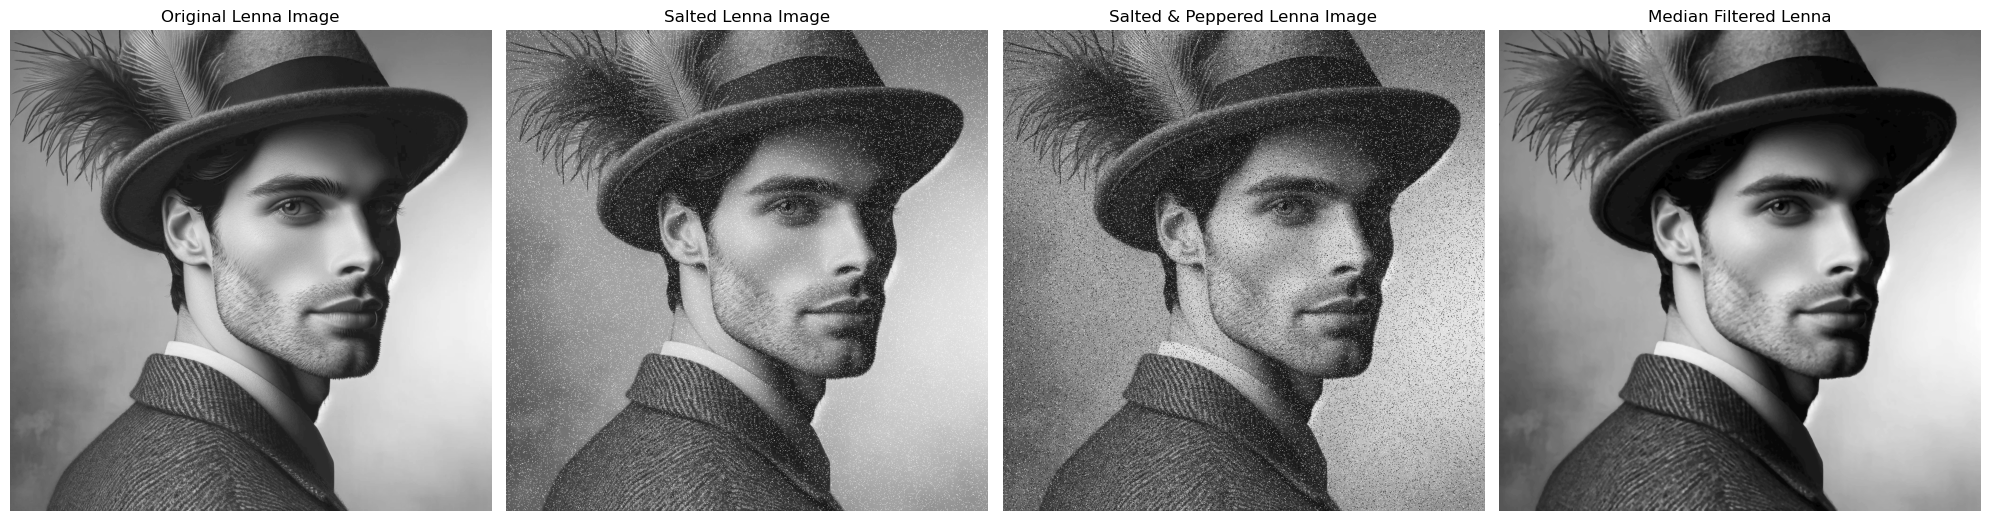

In [19]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
lenna_image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)

salted_lenna =   generate_salt_noise(lenna_image)
peppered_lenna = generate_pepper_noise(salted_lenna)
filtered_lenna = cv2.medianBlur(peppered_lenna, 5) # 5*5 filter

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

axes[0].imshow(lenna_image, cmap='gray')
axes[0].set_title('Original Lenna Image')
axes[0].axis('off')

axes[1].imshow(salted_lenna, cmap='gray')
axes[1].set_title('Salted Lenna Image')
axes[1].axis('off')

axes[2].imshow(peppered_lenna, cmap='gray')
axes[2].set_title('Salted & Peppered Lenna Image')
axes[2].axis('off')

axes[3].imshow(filtered_lenna, cmap='gray')
axes[3].set_title('Median Filtered Lenna')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 3-1-2. Gausian Filtering

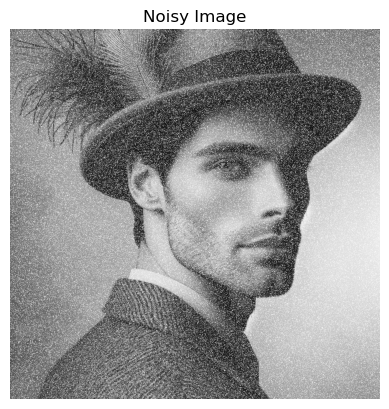

In [20]:
#Gausian filter

image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
mean = 0
sigma =1
gaussian_noise=np.random.normal(mean, sigma, image.shape).astype('uint8')
noisy_image = cv2.add(image, gaussian_noise)

plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

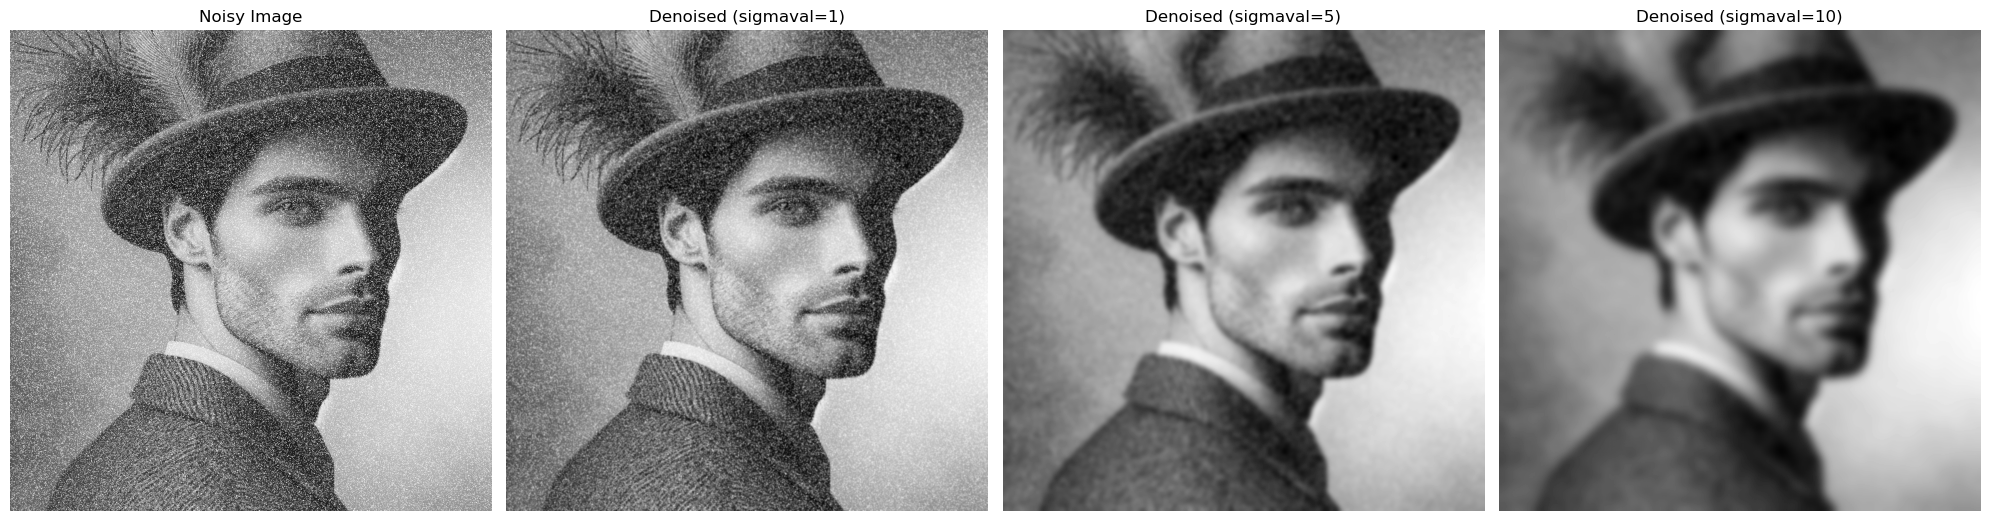

In [21]:
sigma_values = [1,5,10]
denoised_images = []

for sigma in sigma_values:
    denoised = cv2.GaussianBlur(noisy_image, (0,0), sigma)
    denoised_images.append(denoised)

fig, axes = plt.subplots(1, 4, figsize=(20,10))

axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')

for ax, img, sigma in zip(axes[1:], denoised_images, sigma_values):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Denoised (sigmaval={sigma})')
    ax.axis('off')

plt.tight_layout()
plt.show

Sigma value increase, more blur effect

## 3-2. Image Change

### 3-2-1. Affine Transformations: resize, roation and shift

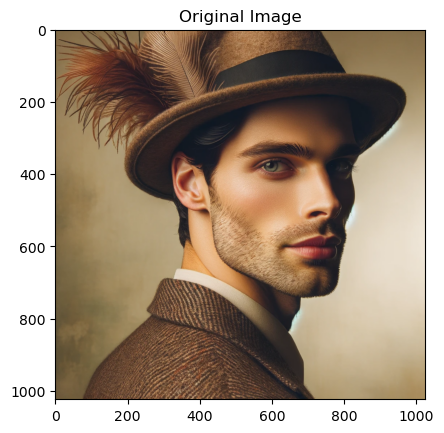

In [22]:
image_path = "like_lenna.png"
img = cv2.imread(image_path)

#초창기 open CV 가 개발될 당시 대부분의 디지털 카메라에서 일반적으로 사용되는 포맷 BGR 이었습니다. 그래서 이 과정이 필요.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.show()

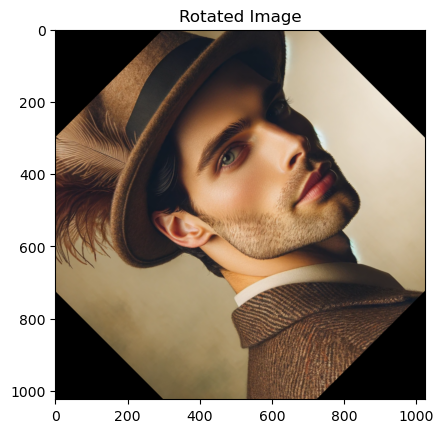

In [23]:
def rotate_image(image, angle, center=None):
    rows, cols, _ = image.shape
    if center is None:
        center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(image, M, (cols,rows))
    return rotated

rotated_img = rotate_image(img, 45)
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.show()

### 3-2-2. Perspective Transformations

--2024-09-08 00:37:30--  https://raw.githubusercontent.com/Lilcob/test_colab/main/perspective_test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545890 (533K) [image/jpeg]
Saving to: 'perspective_test.jpg'

     0K .......... .......... .......... .......... ..........  9% 1.50M 0s
    50K .......... .......... .......... .......... .......... 18% 2.74M 0s
   100K .......... .......... .......... .......... .......... 28%  871K 0s
   150K .......... .......... .......... .......... .......... 37% 7.74M 0s
   200K .......... .......... .......... .......... .......... 46% 1.73M 0s
   250K .......... .......... .......... .......... .......... 56% 3.91M 0s
   300K .......... .......... .......... .......... .......... 65% 2.66M 0s
   350K .......... ....

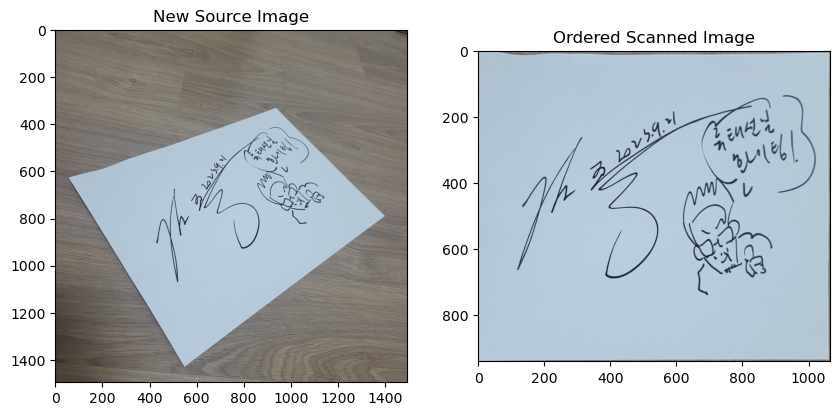

In [24]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/perspective_test.jpg

# load image
image_path = 'perspective_test.jpg'
new_source_image = cv2.imread(image_path)

# Corner location (좌표 순서 변경)
ordered_corners = np.array([[57, 630], [936, 330], [1404, 792], [550, 1431]], dtype='float32')

# Calculate width and height
ordered_width = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[1]),
                        np.linalg.norm(ordered_corners[2] - ordered_corners[3])))
ordered_height = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[3]),
                         np.linalg.norm(ordered_corners[1] - ordered_corners[2])))

# 변환이 될 꼭지점 좌표 지정
ordered_rect_corners = np.array([[0, 0], [ordered_width, 0], [ordered_width, ordered_height], [0, ordered_height]], dtype='float32')

# 호모그래피 행렬 계산
ordered_scan_matrix = cv2.getPerspectiveTransform(ordered_corners, ordered_rect_corners)

# 원근 변환 다시 적용
ordered_scanned_image = cv2.warpPerspective(new_source_image, ordered_scan_matrix, (ordered_width, ordered_height))

# 스캔된 이미지 다시 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("New Source Image")
plt.imshow(cv2.cvtColor(new_source_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Ordered Scanned Image")
plt.imshow(cv2.cvtColor(ordered_scanned_image, cv2.COLOR_BGR2RGB))
plt.show()

### 3-2-3. Low-pass filter and High-pass filter

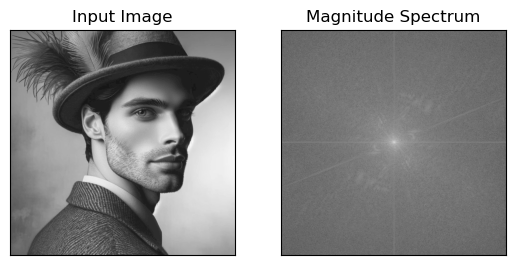

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 불러오기
image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)

# 2. 2D 푸리에 변환 적용
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum_original = 20 * np.log(np.abs(fshift))

# 3. 주파수 도메인 이미지 시각화 (위에서 이미 계산했습니다.)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [26]:
# 4. 필터링 적용 () 고주파 성분만 제거하는 Low-pass 필터 적용)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30
mask = np.ones((rows, cols), np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0
fshift_filtered = fshift * mask

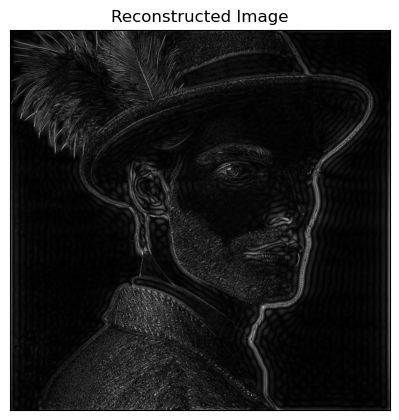

In [27]:
# 5. 역 푸리에 변환
f_ishift = np.fft.ifftshift(fshift_filtered)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)

# 6. 결과 이미지 시각화
plt.figure(figsize=(12, 12))

plt.subplot(133), plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
     

## 3-3. Image Pyramid

### 3-3-1. Gaussian Pyramid

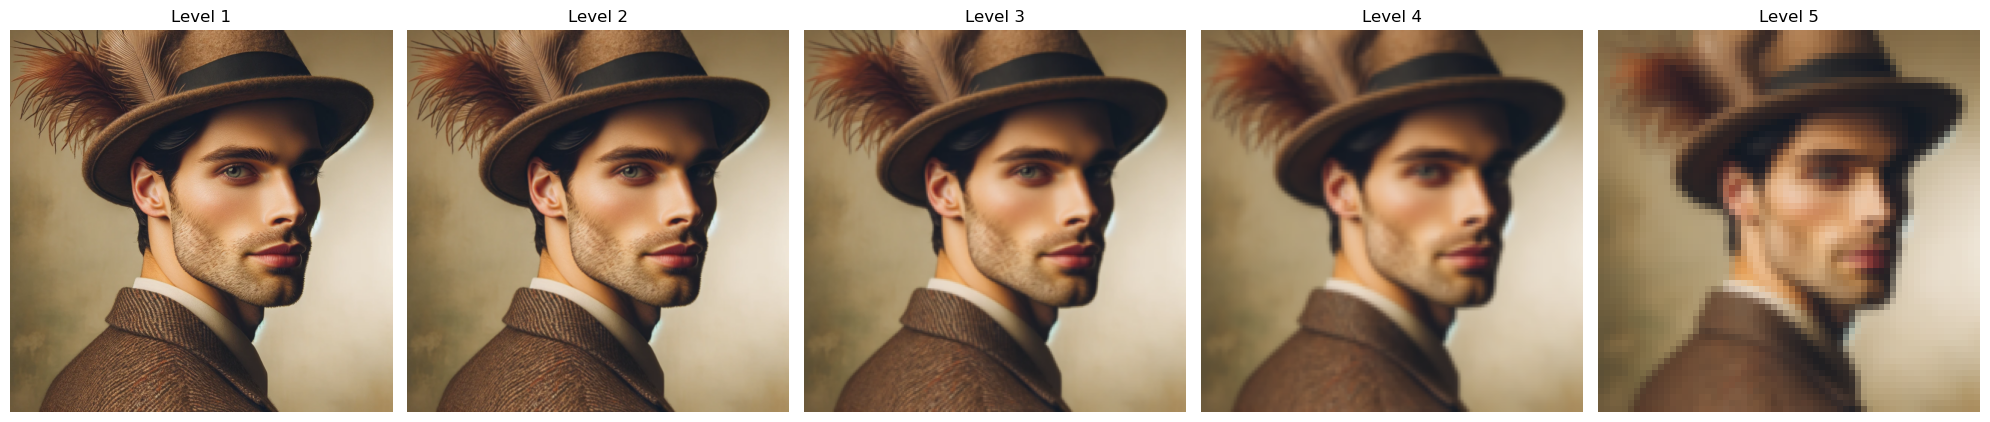

In [28]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread("like_lenna.png", cv2.IMREAD_COLOR)
# OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gaussian_pyramid(image, levels):
    pyramid = [image]
    for i in range(levels-1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

levels = 5
pyramid = gaussian_pyramid(image_rgb, levels)

# 가우시안 피라미드를 시각화
fig, axes = plt.subplots(1, levels, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.imshow(pyramid[i])
    ax.axis('off')
    ax.set_title(f'Level {i+1}')

plt.tight_layout()
plt.show()
     

### 3-3-2. Laplacian Pyramid

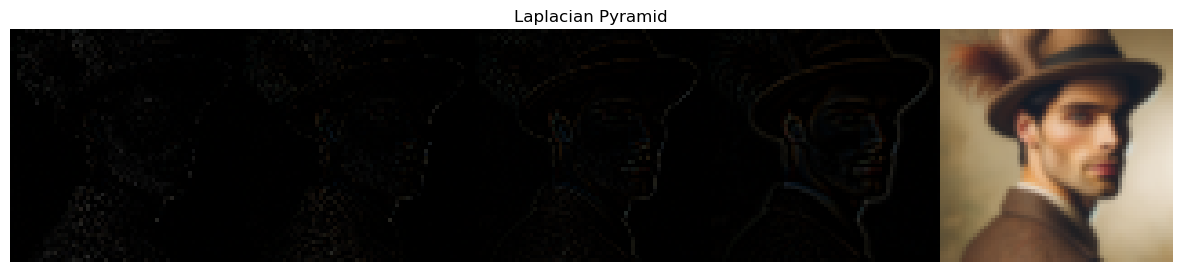

In [29]:
# 1. 이미지 로드
image = cv2.imread("like_lenna.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2. 가우시안 피라미드 생성 함수
def gaussian_pyramid(image, levels):
    """이미지의 가우시안 피라미드를 생성하는 함수"""
    pyramid = [image]
    for i in range(levels-1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# 3. 라플라시안 피라미드 생성 함수
def laplacian_pyramid(gaussian_pyramid):
    laplacian = []
    for i in range(len(gaussian_pyramid) - 1):
        next_level = cv2.pyrUp(gaussian_pyramid[i+1])
        if next_level.shape[0] > gaussian_pyramid[i].shape[0]:
            next_level = next_level[:-1, :, :]
        if next_level.shape[1] > gaussian_pyramid[i].shape[1]:
            next_level = next_level[:, :-1, :]
        lap = cv2.subtract(gaussian_pyramid[i], next_level)
        laplacian.append(lap)
    laplacian.append(gaussian_pyramid[-1])
    return laplacian

levels = 5
g_pyramid = gaussian_pyramid(image_rgb, levels)
l_pyramid = laplacian_pyramid(g_pyramid)

# 4. 라플라시안 피라미드를 가로로 연결
min_height = min([img.shape[0] for img in l_pyramid])
concatenated_laplace_horizontal = cv2.resize(l_pyramid[0], (int(l_pyramid[0].shape[1] * min_height / l_pyramid[0].shape[0]), min_height))

fig, ax = plt.subplots(figsize=(15, 6))

for idx, img in enumerate(l_pyramid[1:], start=1):
    resized_img = cv2.resize(img, (int(img.shape[1] * min_height / img.shape[0]), min_height))
    concatenated_laplace_horizontal = cv2.hconcat([concatenated_laplace_horizontal, resized_img])

ax.imshow(concatenated_laplace_horizontal, cmap='gray')
ax.axis('off')

plt.title('Laplacian Pyramid')
plt.show()
     

## 3-4. Image border detection

### 3-4-1. Canny edges

Text(0.5, 1.0, 'Canny Edge Detection')

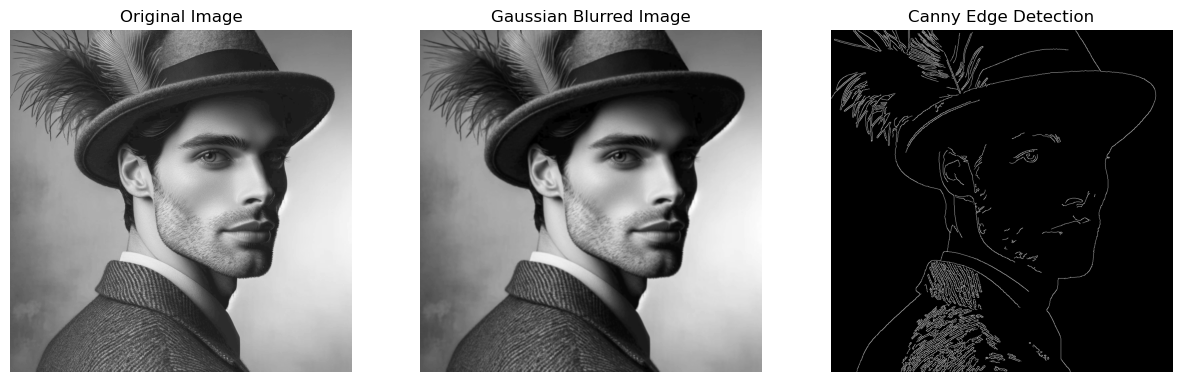

In [30]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("like_lenna.png", cv2.IMREAD_GRAYSCALE)
# 가우시안 블러 적용
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# 2. 캐니 에지 검출
canny_edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

#3. 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(blurred_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Gaussian Blurred Image')
axes[2].imshow(canny_edges, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Canny Edge Detection')

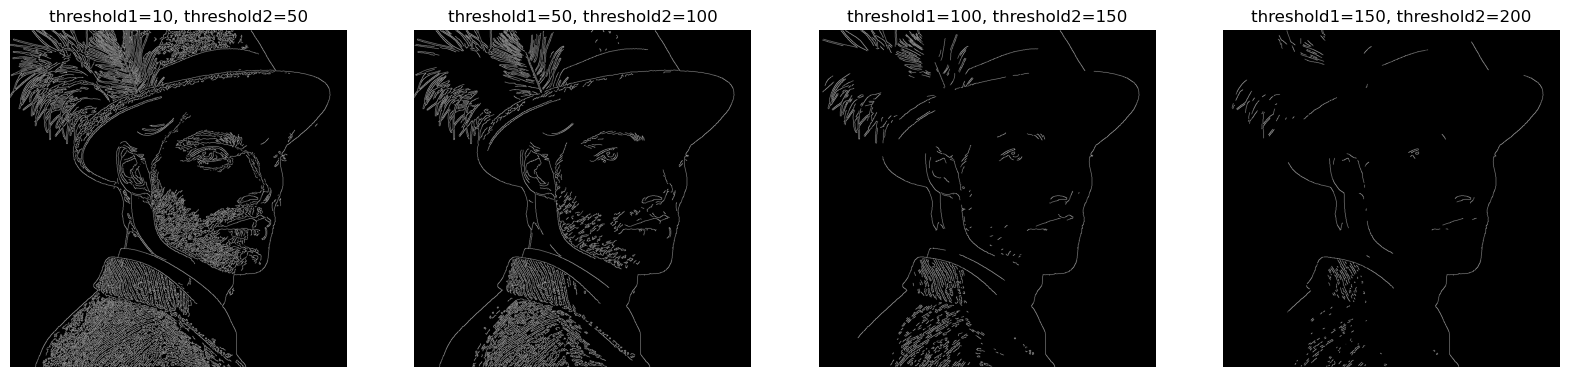

In [31]:
# 다양한 임계값 조합으로 캐니 에지 검출 수행
thresholds = [(10, 50), (50, 100), (100, 150), (150, 200)]

canny_results = []

for threshold1, threshold2 in thresholds:
    canny_image = cv2.Canny(blurred_image, threshold1=threshold1, threshold2=threshold2)
    canny_results.append(canny_image)

# 시각화
fig, axes = plt.subplots(1, len(thresholds), figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(canny_results[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'threshold1={thresholds[i][0]}, threshold2={thresholds[i][1]}')

### 3-4-2. Prewitt and Sobel Edge Detection

In [32]:
from matplotlib import pyplot as plt
import cv2

# 이미지 불러오기
image = cv2.imread("like_lenna.png", cv2.IMREAD_GRAYSCALE)

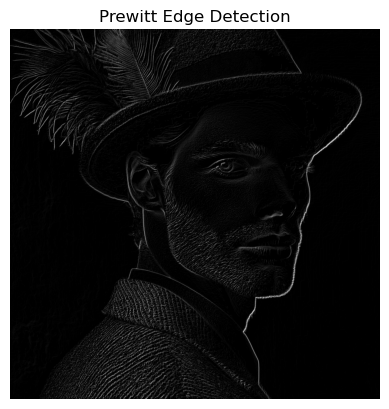

In [33]:
# 프리윗 커널 정의
kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# 프리윗 커널 적용
gx = cv2.filter2D(image, -1, kx)
gy = cv2.filter2D(image, -1, ky)

# 결과 이미지
prewitt_result = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

# 결과 출력
plt.imshow(prewitt_result, cmap='gray')
plt.axis('off')
plt.title('Prewitt Edge Detection')
plt.show()

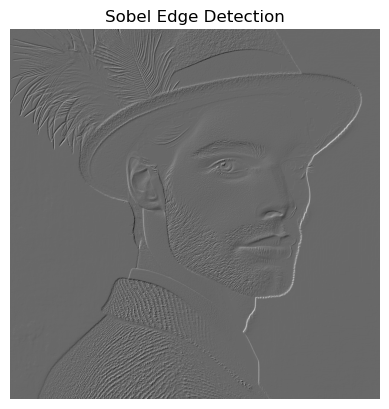

In [34]:
# 소벨 커널 적용
gx_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gy_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# 결과 이미지
sobel_result = cv2.addWeighted(gx_sobel, 0.5, gy_sobel, 0.5, 0)

# 결과 출력
plt.imshow(sobel_result, cmap='gray')
plt.axis('off')
plt.title('Sobel Edge Detection')
plt.show()